In [1]:
from lionagi.core import func_to_tool


def multiply(number1: float, number2: float):
    """
    Perform multiplication on two numbers.

    Args:
        number1: First number to multiply.
        number2: Second number to multiply.

    Returns:
        The product of number1 and number2.

    """
    return number1 * number2


tool_m = func_to_tool(multiply)

In [2]:
from lionagi.core import System, Instruction

sys_mul = System(
    system="you are asked to perform as a function picker and parameter provider"
)
instruction = Instruction(
    instruction="Think step by step, understand the following basic math question and provide parameters for function calling."
)

In [3]:
question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"

context = {"Question1": question1, "question2": question2}

# Create Graph-based Structure

In [4]:
from lionagi.core import Structure

struct_mul = Structure()
struct_mul.add_node(sys_mul)
struct_mul.add_node(instruction)
struct_mul.add_node(tool_m[0])
struct_mul.add_relationship(sys_mul, instruction)
struct_mul.add_relationship(instruction, tool_m[0])

In [5]:
# %pip install networkx

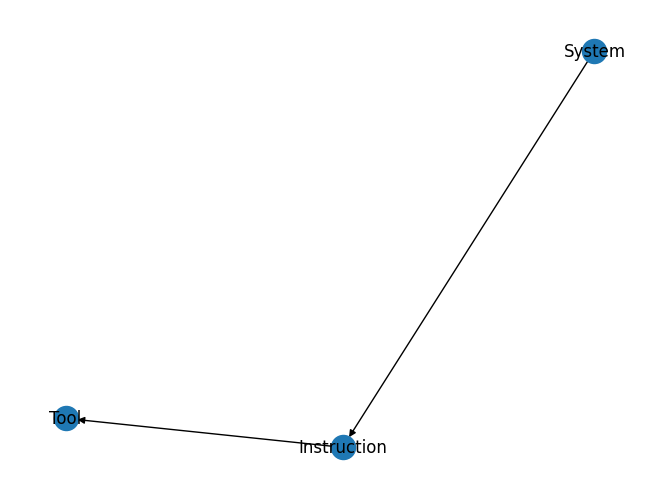

In [6]:
import networkx as nx

g = struct_mul.graph.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [7]:
from lionagi.core import ExecutableBranch, BaseAgent


# output_parser_func parameter: agent self
def multiply_output_parser(agent):
    return agent.executable.responses


executable = ExecutableBranch()

calc = BaseAgent(
    structure=struct_mul,
    executable_obj=executable,
    output_parser=multiply_output_parser,
)

In [8]:
result = await calc.execute(context=context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

In [9]:
calc.executable.branch.messages

,node_id,timestamp,role,sender,recipient,content
0,5ee0c2a39968e4bf833bdd4d5e2c9fe9,2024_03_22T15_02_20_994425+00_00,system,system,assistant,"{""system_info"": ""you are asked to perform as a..."
1,995279f47cb8c9c700855990e55b1aca,2024_03_22T15_02_21_853626+00_00,user,user,assistant,"{""instruction"": ""Think step by step, understan..."
2,427fcbc84b2efac2aae4f00b47b5748c,2024_03_22T15_02_36_529263+00_00,assistant,action_request,action,"{""action_request"": [{""recipient_name"": ""functi..."
3,2efba22cb518efa381bff5606920f2bd,2024_03_22T15_02_36_530615+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."
4,cfc61cb16444bb5fe6b88ce3162ca464,2024_03_22T15_02_36_531262+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."


In [10]:
for content in calc.executable.branch.messages["content"]:
    print(content)

{"system_info": "you are asked to perform as a function picker and parameter provider"}
{"instruction": "Think step by step, understand the following basic math question and provide parameters for function calling.", "context": {"Question1": "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?", "question2": "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"}}
{"action_request": [{"recipient_name": "functions.multiply", "parameters": {"number1": 25, "number2": 8}}, {"recipient_name": "functions.multiply", "parameters": {"number1": 48, "number2": 1}}]}
{"action_response": {"function": "multiply", "arguments": {"number1": 25, "number2": 8}, "output": 200}}
{"action_response